### Data Cleaning Notebook: For a dataset with zipcode as rows, we did dummied the ratings and Price.
### For the categories I used countvectorizer to assign the matrix to the original data set.
### As the Countvecrizer does not perform well, I saved the data with two copies, one with countvecrizer one without

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.cluster import KMeans

import pickle

In [2]:
df= pd.read_csv('../data/data_income.csv')
df.head()

,Unnamed: 0,alias,category,city,id,latitude,longitude,price,rating,review_count,zip_code,price*rating,ave_agi,count
0,0,重庆特色小面-chongqing-special-noodles-san-gabriel-3,"['noodles', 'chinese']",San Gabriel,mm6l24khOfXhKqn4pKVojA,34.103070,-118.091840,1,4.0,204.0,91776,4.0,37.21102,166
1,1,yung-ho-cafe-san-gabriel-2,"['taiwanese', 'chinese', 'breakfast_brunch']",San Gabriel,zO8V4fi49QQMn4Sa_0OS9g,34.081429,-118.084785,1,3.0,263.0,91776,3.0,37.21102,166
2,2,yuk-dae-jang-san-gabriel-2,['korean'],San Gabriel,DwvljRkxkMEljQBYX-MeTw,34.102080,-118.109870,2,4.5,157.0,91776,9.0,37.21102,166
3,3,young-dong-tofu-house-san-gabriel-2,"['korean', 'soup', 'bbq']",San Gabriel,ArjemSkdDmtaSOJ05ayM6Q,34.104029,-118.087644,2,4.0,2235.0,91776,8.0,37.21102,166
4,4,yoshino-sushi-san-gabriel,"['sushi', 'japanese']",San Gabriel,tD6NoOzVpVuhzRVdCU7POQ,34.080471,-118.092799,2,3.5,923.0,91776,7.0,37.21102,166


In [3]:
df.shape

(34095, 14)

In [4]:
df.drop(columns = ['id','Unnamed: 0'], inplace = True)

## change the data set from restaurant based to zipcode based

In [5]:
df_pivot = df.pivot_table(index = ['zip_code'])
df_pivot.head()

,ave_agi,count,latitude,longitude,price,price*rating,rating,review_count
zip_code,,,,,,,,
90001,25.152933,178,33.976255,-118.249135,1.280899,4.735955,3.615169,50.129213
90002,24.410496,41,33.952192,-118.245547,1.097561,3.804878,3.365854,28.463415
90003,23.404622,142,33.972702,-118.271297,1.197183,3.887324,3.274648,35.859155
90004,59.128947,285,34.075288,-118.306200,1.557895,6.122807,3.866667,260.214035
90005,45.821128,231,34.059329,-118.303066,1.645022,6.233766,3.757576,385.683983


##  Create New column for the combo of Price*review_count

In [6]:
df_pivot['price*review_count']=df_pivot['price']*df_pivot['review_count']

In [7]:
df_pivot.head()

,ave_agi,count,latitude,longitude,price,price*rating,rating,review_count,price*review_count
zip_code,,,,,,,,,
90001,25.152933,178,33.976255,-118.249135,1.280899,4.735955,3.615169,50.129213,64.210453
90002,24.410496,41,33.952192,-118.245547,1.097561,3.804878,3.365854,28.463415,31.240333
90003,23.404622,142,33.972702,-118.271297,1.197183,3.887324,3.274648,35.859155,42.929974
90004,59.128947,285,34.075288,-118.306200,1.557895,6.122807,3.866667,260.214035,405.386076
90005,45.821128,231,34.059329,-118.303066,1.645022,6.233766,3.757576,385.683983,634.458500


## Breakdown the price from original Pivot table(average) to count how many we have for each price category

In [8]:
count_price = (pd.crosstab(df["zip_code"], df['price']))
count_price.columns = ['price_1','price_2','price_3','price_4']
count_price.head()

,price_1,price_2,price_3,price_4
zip_code,,,,
90001,128,50,0,0
90002,37,4,0,0
90003,120,18,2,2
90004,134,143,8,0
90005,85,143,3,0


# Break Down for Rating column

In [9]:
count_rating = (pd.crosstab(df["zip_code"], df['rating']))
count_rating.columns = ['rating_0.0','rating_1.0','rating_1.5','rating_2.0','rating_2.5','rating_3.0','rating_3.5','rating_4.0','rating_4.5','rating_5']
count_rating.head()

,rating_0.0,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5
zip_code,,,,,,,,,,
90001,0,0,8,16,18,17,26,36,33,24
90002,0,0,6,8,2,0,2,11,6,6
90003,0,4,14,20,14,14,18,20,20,18
90004,0,0,1,2,18,26,52,112,53,21
90005,0,2,2,4,7,31,40,98,45,2


## combine price and rating to zipcode file

In [10]:
df_count = pd.merge(count_price, count_rating, left_on = 'zip_code', right_on = 'zip_code')
df_count.head()

,price_1,price_2,price_3,price_4,rating_0.0,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5
zip_code,,,,,,,,,,,,,,
90001,128,50,0,0,0,0,8,16,18,17,26,36,33,24
90002,37,4,0,0,0,0,6,8,2,0,2,11,6,6
90003,120,18,2,2,0,4,14,20,14,14,18,20,20,18
90004,134,143,8,0,0,0,1,2,18,26,52,112,53,21
90005,85,143,3,0,0,2,2,4,7,31,40,98,45,2


In [11]:
df_count.shape

(328, 14)

In [12]:
df_pivot.shape

(328, 9)

## Below is the combined data for zipcode, price, and rating, without countvecrizer the catogory

In [13]:
df_dummy = pd.merge(df_pivot, df_count, on="zip_code")
df_dummy.drop(columns = ['price','rating'] ,inplace = True)
df_dummy.reset_index(inplace = True)
df_dummy.head()

,zip_code,ave_agi,count,latitude,longitude,price*rating,review_count,price*review_count,price_1,price_2,...,rating_0.0,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5
0,90001,25.152933,178,33.976255,-118.249135,4.735955,50.129213,64.210453,128,50,...,0,0,8,16,18,17,26,36,33,24
1,90002,24.410496,41,33.952192,-118.245547,3.804878,28.463415,31.240333,37,4,...,0,0,6,8,2,0,2,11,6,6
2,90003,23.404622,142,33.972702,-118.271297,3.887324,35.859155,42.929974,120,18,...,0,4,14,20,14,14,18,20,20,18
3,90004,59.128947,285,34.075288,-118.306200,6.122807,260.214035,405.386076,134,143,...,0,0,1,2,18,26,52,112,53,21
4,90005,45.821128,231,34.059329,-118.303066,6.233766,385.683983,634.458500,85,143,...,0,2,2,4,7,31,40,98,45,2


In [14]:
df_dummy['zip_code'] = df_dummy['zip_code'].astype(str)

In [15]:
df_dummy.dtypes

zip_code               object
ave_agi               float64
count                   int64
latitude              float64
longitude             float64
price*rating          float64
review_count          float64
price*review_count    float64
price_1                 int64
price_2                 int64
price_3                 int64
price_4                 int64
rating_0.0              int64
rating_1.0              int64
rating_1.5              int64
rating_2.0              int64
rating_2.5              int64
rating_3.0              int64
rating_3.5              int64
rating_4.0              int64
rating_4.5              int64
rating_5                int64
dtype: object

In [16]:
#df_dummy = df_dummy[df_dummy['count']>=50]

In [17]:
#df_dummy.to_csv('../data/data_nocv.csv')

# Making the category a matrix via countvectrizor 

In [18]:
cate_dict = df['category'].to_dict()

In [19]:
for i in cate_dict:
    cate_dict[i] = cate_dict[i].replace('[', '')
    cate_dict[i] = cate_dict[i].replace(']', '')
    cate_dict[i] = cate_dict[i].replace('\'', '')
    cate_dict[i] = cate_dict[i].split(', ')

In [20]:
df_cate= pd.DataFrame.from_dict(cate_dict, orient = 'index')
df_cate.head()

,0,1,2,3,4
0,noodles,chinese,None,None,None
1,taiwanese,chinese,breakfast_brunch,None,None
2,korean,None,None,None,None
3,korean,soup,bbq,None,None
4,sushi,japanese,None,None,None


In [21]:
df_cate['zip_code'] = df['zip_code']
df_cate

,0,1,2,3,4,zip_code
0,noodles,chinese,None,None,None,91776
1,taiwanese,chinese,breakfast_brunch,None,None,91776
2,korean,None,None,None,None,91776
3,korean,soup,bbq,None,None,91776
4,sushi,japanese,None,None,None,91776
...,...,...,...,...,...,...
34090,burgers,hotdogs,None,None,None,93955
34091,burgers,hotdogs,None,None,None,93955
34092,tradamerican,None,None,None,None,92397
34093,foodstands,None,None,None,None,92056


In [22]:
categories_df = df_cate.astype(str).groupby('zip_code').agg(lambda x: ' '.join(x.unique())) ##borrowwed from Erin Hwang 

In [23]:
categories_df['cate_text_by_zip'] = categories_df[0] + ' ' + categories_df[1] + ' ' + categories_df[2] + ' ' + categories_df[3] + ' ' + categories_df[4]
categories_df.head()##borrowwed from Erin Hwang

,0,1,2,3,4,cate_text_by_zip
zip_code,,,,,,
90001,foodtrucks chicken_wings donuts hotdogs street...,comfortfood None coffee asianfusion japanese v...,sandwiches None hotdog food catering mexican m...,None,None,foodtrucks chicken_wings donuts hotdogs street...
90002,coffee hotdogs mexican tacos sandwiches salvad...,breakfast_brunch burgers None foodstands hotdo...,None coffee mexican chicken_wings breakfast_br...,None,None,coffee hotdogs mexican tacos sandwiches salvad...
90003,sportsbars japanese donuts soulfood burgers ta...,None sandwiches coffee mexican hotdogs foodsta...,None coffee sandwiches meats customcakes chick...,None,None,sportsbars japanese donuts soulfood burgers ta...
90004,korean japanese desserts bbq streetvendors piz...,chinese None coffee noodles korean seafood mex...,noodles None korean smokehouse raw_food italia...,None,None,korean japanese desserts bbq streetvendors piz...
90005,korean donuts coffee hotdogs chinese thai chic...,None noodles coffee bubbletea asianfusion chic...,None sandwiches juicebars italian korean sushi...,None,None,korean donuts coffee hotdogs chinese thai chic...


In [24]:
cvec = CountVectorizer()

In [25]:
categories_df.reset_index(inplace = True)

In [26]:
X = categories_df['cate_text_by_zip']
y = categories_df['zip_code']

In [27]:
df_cate = pd.DataFrame(cvec.fit_transform(X).toarray(),
                columns=cvec.get_feature_names() ) #
df_cate.head()

,acaibowls,accessories,acupuncture,afghani,african,airportlounges,amusementparks,antiques,appliances,arabian,...,whiskeybars,wholesale_stores,wholesalers,wine_bars,wineries,winetasteclasses,winetastingroom,womenscloth,wraps,yoga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## save the data with countvecrizer

In [28]:
df = pd.concat([df_dummy, df_cate], axis=1, sort=False)
df.head()

,zip_code,ave_agi,count,latitude,longitude,price*rating,review_count,price*review_count,price_1,price_2,...,whiskeybars,wholesale_stores,wholesalers,wine_bars,wineries,winetasteclasses,winetastingroom,womenscloth,wraps,yoga
0,90001,25.152933,178,33.976255,-118.249135,4.735955,50.129213,64.210453,128,50,...,0,0,0,0,0,0,0,0,0,0
1,90002,24.410496,41,33.952192,-118.245547,3.804878,28.463415,31.240333,37,4,...,0,0,0,0,0,0,0,0,0,0
2,90003,23.404622,142,33.972702,-118.271297,3.887324,35.859155,42.929974,120,18,...,0,0,0,0,0,0,0,0,0,0
3,90004,59.128947,285,34.075288,-118.306200,6.122807,260.214035,405.386076,134,143,...,0,0,0,0,0,0,0,0,0,0
4,90005,45.821128,231,34.059329,-118.303066,6.233766,385.683983,634.458500,85,143,...,0,0,0,1,0,0,0,0,0,0


In [29]:
df.to_csv('../data/data_cv.csv')

In [30]:
#count_price_rating = (pd.crosstab(df["zip_code"], df['price*rating']))
#count_price_rating.head()

In [31]:
#numeric_data = df._get_numeric_data().columns

## Begin to Model

## Tried both data with vecorizer and without, turns out the data without vectorizer performs better, so I will stick with this one

In [32]:
df_dummy.dtypes

zip_code               object
ave_agi               float64
count                   int64
latitude              float64
longitude             float64
price*rating          float64
review_count          float64
price*review_count    float64
price_1                 int64
price_2                 int64
price_3                 int64
price_4                 int64
rating_0.0              int64
rating_1.0              int64
rating_1.5              int64
rating_2.0              int64
rating_2.5              int64
rating_3.0              int64
rating_3.5              int64
rating_4.0              int64
rating_4.5              int64
rating_5                int64
dtype: object

In [33]:
df_dummy.shape

(328, 22)

## Jerry's way to countvectorizer

In [34]:
#df_dummy = pd.read_csv('../data/data_income.csv')

In [35]:
X = df_dummy.drop(columns=['ave_agi','latitude','longitude'])
#features = list(X.columns)
y = df_dummy['ave_agi']

In [36]:

# # https://stackoverflow.com/questions/46778392/
# # https://stackoverflow.com/questions/34734940/

# '''
# use function for both X_train and X_test
# you can save as a different DF or overwrite

# maybe this can go in a markdown cell:

#     We first use CountVectorizer() to create dummy columns for
#     each category. We multiply these columns the price by the 
#     dummy categories so that we can get a price inside the
#     category column.
    
#     e.g. if a Korean restaurant has a price of '3', then we 
#     want that row to have a '3' in the 'korean' column.
    
#     This allows us to standard scale each category column so
#     that we can assess the relative price of each business
#     listing given its category. That way, if one area has
#     relatively expensive Korean restaurants, and another area
#     has relatively inexpensive jewelry stores, those scaled
#     factors may have an effect in our ability to model.
    
# '''

# def category_pricer(X, y, state=42):
#     '''
#     Adds scaled price columns to a Yelp Business DataFrame.
    
#     Arguments:
#         X:              dataframe containing all features
#         y:              array containing all targets
#         state:          random state of train_test_split()
                                    
#     Returns:
#         X_train, X_test, y_train, y_test
#         X_train and X_test contain two new columns:
#         'price_sc':     scaled price
#         'adj_price':    mean of category-scaled prices

#     Goal:   to standard scale the price of a business listing
#             given its category.
#     '''
#     X_train, X_test, y_train, y_test = train_test_split(X, 
#                                                     y, 
#                                                     random_state=state)    
    
#     # instantiate CountVectorizer() and fit 'category'
#     cvect = CountVectorizer()

#     # fit_transform train data
#     c_train = cvect.fit_transform(X_train['category']).toarray()
#     for i in range(len(c_train)):
#         c_train[i] = c_train[i] * X_train['price'].values[i]
#     cat_train = cvect.get_feature_names()
#     C_train = pd.DataFrame(c_train, columns=cat_train)
#     C_train.replace(0, np.NaN, inplace=True)
    
#     # only transform test data
#     c_test = cvect.transform(X_test['category']).toarray()
#     for j in range(len(c_test)):
#         c_test[j] = c_test[j] * X_test['price'].values[j]
#     cat_test = cvect.get_feature_names()
#     C_test = pd.DataFrame(c_test, columns=cat_test)
#     C_test.replace(0, np.NaN, inplace=True)
    
#     # standard scale each category
#     sc = StandardScaler()
#     S_train = pd.DataFrame(sc.fit_transform(C_train), columns=cat_train)
#     S_test = pd.DataFrame(sc.transform(C_test), columns=cat_test)
    
#     X_train['price_sc'] = sc.fit_transform(X_train[['price']])
#     X_test['price_sc'] = sc.transform(X_test[['price']])
    
#     # right now if a listing belongs to multiple categories,
#     # it will take the average of the scaled category scores.
#     X_train['adj_price'] = list(S_train.mean(axis=1))
#     X_test['adj_price'] = list(S_test.mean(axis=1))
    
#     return X_train, X_test, y_train, y_test

In [37]:
#df_dummy

In [38]:
#category_pricer(X,y,state=42)

In [39]:
X.shape

(328, 19)

In [40]:
y.shape

(328,)

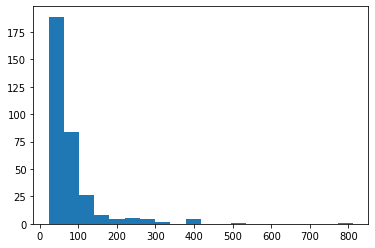

In [41]:
plt.hist(df["ave_agi"], bins=20);

In [42]:
y = np.log(df_dummy["ave_agi"])  #y = np.log(df.copy()["ave_agi"])

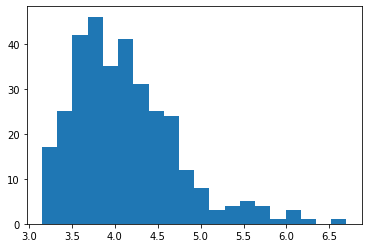

In [43]:
plt.hist(y, bins=20);

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X.copy(), y.copy(), random_state=42, test_size=0.3
)

In [45]:
# sc = StandardScaler()  did not have significant impact
# X_train = sc.fit_transform(X_train)
# X_test =sc.transform(X_test)

# Trying different models
 - linear regression
 - knn regression
 - decision tree
 - bagging
 - random_forest
 - ada boost
 - support_vector

In [46]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

cart_reg = DecisionTreeRegressor()
cart_reg.fit(X_train, y_train)

bagged_reg = BaggingRegressor()
bagged_reg.fit(X_train, y_train)

random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)

adaboost_reg = AdaBoostRegressor()
adaboost_reg.fit(X_train, y_train)

support_vector_reg = SVR()
support_vector_reg.fit(X_train, y_train)

C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

# Evaluate our models

In [47]:
def rmse_score(model, X_train, X_test, y_train, y_test):
    mse_train = mean_squared_error(y_true = y_train,
                                  y_pred = model.predict(X_train))
    mse_test = mean_squared_error(y_true = y_test,
                                  y_pred = model.predict(X_test))
    rmse_train = mse_train ** 0.5
    rmse_test = mse_test ** 0.5
    
    print("The training RMSE for " + str(model) + " is: " + str(rmse_train))
    print("The testing RMSE for " + str(model) + " is: " + str(rmse_test))
    return (rmse_train, rmse_test)

## Evaluate linear regression

In [48]:
rmse_score(linear_reg, X_train, X_test, y_train, y_test)

The training RMSE for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 0.3847674614112262
The testing RMSE for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 0.460269926876942


(0.3847674614112262, 0.460269926876942)

In [49]:
print(linear_reg.score(X_train, y_train))
print (linear_reg.score(X_test, y_test))

0.5404421729971106
0.5503422247321481


## Evaluate Knn

In [50]:
rmse_score(knn_reg, X_train, X_test, y_train, y_test)

The training RMSE for KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is: 0.3562870841678369
The testing RMSE for KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is: 0.5837849171573071


(0.3562870841678369, 0.5837849171573071)

In [51]:
print(knn_reg.score(X_train, y_train))
print (knn_reg.score(X_test, y_test))

0.6059569707038901
0.27662641118854836


## Evaluate decision tree

In [52]:
rmse_score(cart_reg, X_train, X_test, y_train, y_test)

The training RMSE for DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') is: 8.293598681223066e-06
The testing RMSE for DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') is: 0.6074857563964047


(8.293598681223066e-06, 0.6074857563964047)

In [53]:
print(cart_reg.score(X_train, y_train))
print (cart_reg.score(X_test, y_test))

0.9999999997864845
0.21669823198738067


## Evaluate Bagging model

In [54]:
rmse_score(bagged_reg, X_train, X_test, y_train, y_test)

The training RMSE for BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False) is: 0.16789491316666183
The testing RMSE for BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False) is: 0.49216914576317056


(0.16789491316666183, 0.49216914576317056)

In [55]:
print(bagged_reg.score(X_train, y_train))
print (bagged_reg.score(X_test, y_test))

0.9124978815228414
0.48585492980436507


## Evaluate random forest

In [56]:
rmse_score(random_forest_reg, X_train, X_test, y_train, y_test)

The training RMSE for RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) is: 0.1733479310759459
The testing RMSE for RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) is: 0.47

(0.1733479310759459, 0.478560820144918)

In [57]:
print(random_forest_reg.score(X_train, y_train))
print (random_forest_reg.score(X_test, y_test))

0.9067216582976698
0.513893769417743


## Evaluate adaboost

In [58]:
rmse_score(adaboost_reg, X_train, X_test, y_train, y_test)

The training RMSE for AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None) is: 0.27098507850621967
The testing RMSE for AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None) is: 0.4761325566620036


(0.27098507850621967, 0.4761325566620036)

In [59]:
print(adaboost_reg.score(X_train, y_train))
print (adaboost_reg.score(X_test, y_test))

0.77205280811263
0.518814353146262


## Evaluate Support vector regression

In [60]:
rmse_score(support_vector_reg, X_train, X_test, y_train, y_test)

The training RMSE for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False) is: 0.15408159972613886
The testing RMSE for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False) is: 0.7058364031760053


(0.15408159972613886, 0.7058364031760053)

In [61]:
print(support_vector_reg.score(X_train, y_train))
print (support_vector_reg.score(X_test, y_test))

0.9263038078133271
-0.05746259415295452


## Test Model with pipelines

In [62]:
pipe = Pipeline([
    ('linear', LinearRegression())
])

pipe_params = {
                 'linear__fit_intercept': [True,False], 
                 'linear__normalize': [True, False],
                 'linear__copy_X': [True, False],
                 'linear__n_jobs': [1,5,10]
}

pipe_gridsearch = GridSearchCV(pipe, 
                                 pipe_params, 
                                 cv=5, 
                                 verbose=1)
pipe_gridsearch.fit(X_train, y_train);
print(pipe_gridsearch.best_score_)
pipe_gridsearch.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.43495195726045005


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.8s finished


Pipeline(memory=None,
         steps=[('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1,
                                  normalize=False))],
         verbose=False)

In [63]:
knn_params = {
    'n_neighbors': range(1, 51, 10),
    'metric': ['euclidean', 'manhattan']
}
knn_gridsearch = GridSearchCV(KNeighborsRegressor(), 
                              knn_params, 
                              cv=5, 
                              verbose=1)
knn_gridsearch.fit(X_train, y_train);
best_knn = knn_gridsearch.best_estimator_
best_knn.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.33644531198001126

In [64]:
cart_params = {
    'max_depth': [15,25,50]
    
}
cart_gridsearch = GridSearchCV(DecisionTreeRegressor(), 
                              cart_params, 
                              cv=5, 
                              verbose=1)
cart_gridsearch.fit(X_train, y_train);
best_cart = cart_gridsearch.best_estimator_
best_cart.score(X_test, y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.19161165383357304

In [65]:
BaggingRegressor()

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [66]:
bag_params = {
    'n_estimators': [120,140,160],
    
    
}
bag_gridsearch = GridSearchCV(BaggingRegressor(),
                              bag_params,
                              cv=5, 
                              verbose=1)
bag_gridsearch.fit(X_train, y_train);
best_bag = bag_gridsearch.best_estimator_
print (best_bag)
best_bag.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    9.2s finished
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=160,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)


0.5208072710911968

In [67]:
rf_params = {
    'n_estimators': [100,110,120],
    'max_depth':[6,7,8,9]
    
    
}
rf_gridsearch = GridSearchCV(RandomForestRegressor(), 
                              rf_params,
                              cv=5, 
                              verbose=1)
rf_gridsearch.fit(X_train, y_train);
best_rf = rf_gridsearch.best_estimator_
print (best_rf)
best_rf.score(X_test, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   25.1s finished
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=110,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


0.5205817879755841

In [68]:
AdaBoostRegressor()

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [69]:
ada_params = {
    'n_estimators': [75,85,90]
}
ada_gridsearch = GridSearchCV(AdaBoostRegressor(), 
                              ada_params, 
                              cv=5, 
                              verbose=1)
ada_gridsearch.fit(X_train, y_train);
best_ada = ada_gridsearch.best_estimator_
print (best_ada)
best_ada.score(X_test, y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    5.3s finished
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=75, random_state=None)


0.5131926340143158

In [70]:
svr_params = {
    'degree': [2,3]
}
svr_gridsearch = GridSearchCV(SVR(), 
                              svr_params, 
                              cv=5, 
                              verbose=1)
svr_gridsearch.fit(X_train, y_train);
best_svr = svr_gridsearch.best_estimator_
print (best_svr)
best_svr.score(X_test, y_test)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\m6zha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

-0.05746259415295452

|model|RMSE Train|RMSE Test|R2 Train|R2 Test|pipeline R2 test|
| --- | --- | --- | --- | ---|---|
|Linear Regression| 0.39|0.44|0.54|0.56|0.46|
|KNN Regression| 0.36|0.60|0.62|0.18|0.26|
|Decision Tree Regression| 1.21e05|0.63|0.99|0.10|0.28|
|Baggin Regression| 0.18|0.50|0.90|0.43|0.51|
|Random Forest Regression| 0.17|0.49|0.91|0.45|0.50|
|Adaboost Regression| 0.28|0.47|0.77|0.51|0.52|
|support vector Regression| 0.32|0.53|0.70|0.37|-0.08|

# Using KMean Cluster to group Zipcodes

In [71]:
def transfer_tune(X, y, k):
    location_data = df_dummy[["latitude", "longitude"]]
    km = KMeans(n_clusters=k,random_state = 42 )
    km.fit(location_data)
    X.loc[:, "cluster"] = km.predict(location_data)
    X_dummy = pd.get_dummies(columns=["cluster"], data=X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_dummy.copy(), y.copy(), random_state=42, test_size=0.3
    )
    linear_reg.fit(X_train, y_train)
    r2 = linear_reg.score(X_test, y_test)
    print(f"{k} : {r2}")

In [72]:
for k in range(20, 50, 1):
    transfer_tune(X, y, k)

20 : 0.5934119875195514
21 : 0.5964477917890778
22 : 0.5496109967418659
23 : 0.5334007250256825
24 : 0.5436164309458081
25 : 0.5987898928279491
26 : 0.5291914707165389
27 : 0.6245291386902023
28 : 0.6146196848685779
29 : 0.5749255054184328
30 : 0.5978552634661582
31 : 0.5808478993577995
32 : 0.5686691175737582
33 : 0.6105741967020487
34 : 0.5531536522440159
35 : 0.6210991004813363
36 : 0.5557709140911724
37 : 0.6487640354567712
38 : 0.5663356276175833
39 : 0.6407734289234903
40 : 0.6376473067133075
41 : 0.6024057104782755
42 : -1.6654440354430678e+17
43 : 0.5277274938790352
44 : -7.692656423687547e+16
45 : -1.011236815095815e+17
46 : -7.962759212027258e+16
47 : -2.0109727247604726e+17
48 : -4750429867534635.0
49 : -4.986430006699397e+16


In [73]:
location_data = df_dummy[["latitude", "longitude"]]
km = KMeans(n_clusters=37, random_state = 42)
km.fit(location_data)
X.loc[:, "cluster"] = km.predict(location_data)
X_dummy = pd.get_dummies(columns=["cluster"], data=X)
X_train, X_test, y_train, y_test = train_test_split(
        X_dummy.copy(), y.copy(), random_state=42, test_size=0.3
)
#model = LinearRegression()
linear_reg.fit(X_train, y_train)
r2 = linear_reg.score(X_test, y_test)
print (r2)

0.6487640354567712


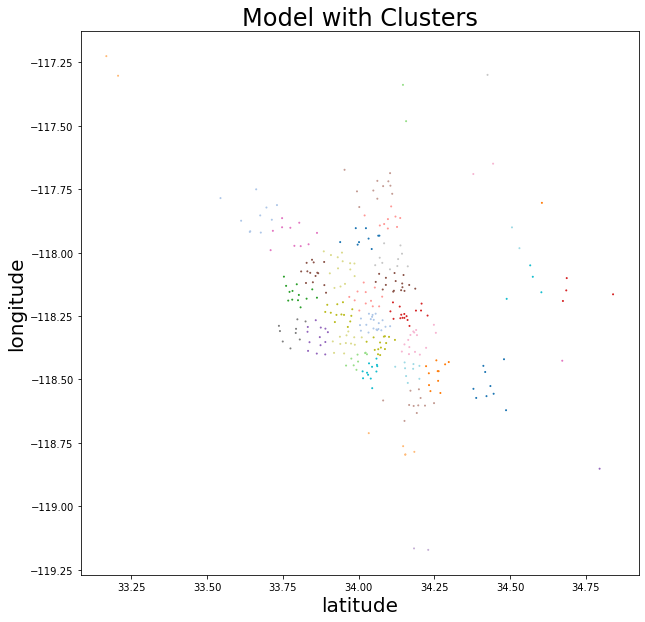

In [74]:
plt.figure(figsize=(10, 10))
plt.scatter(df_dummy.latitude, df_dummy.longitude, c=km.labels_, s=1, cmap="tab20")
plt.xlabel("latitude", fontsize = 20)
plt.ylabel("longitude", fontsize = 20)
plt.title('Model with Clusters', fontsize = 24);

In [75]:
X_train.to_csv('../data/X_train.csv')

In [76]:
y_pred = linear_reg.predict(X_test)

In [77]:
residuals = y_test - y_pred

In [78]:
residuals.mean()

0.04998603347123002

Text(0.5, 1.0, 'Residual Mean')

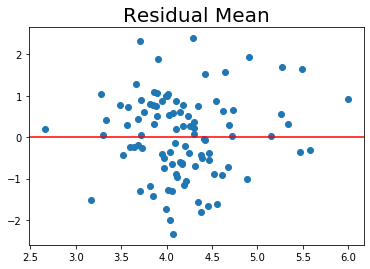

In [79]:
plt.scatter(y_pred, np.random.randn(len(y_pred)))
plt.axhline(0, color='r')
plt.title('Residual Mean',size = 20)

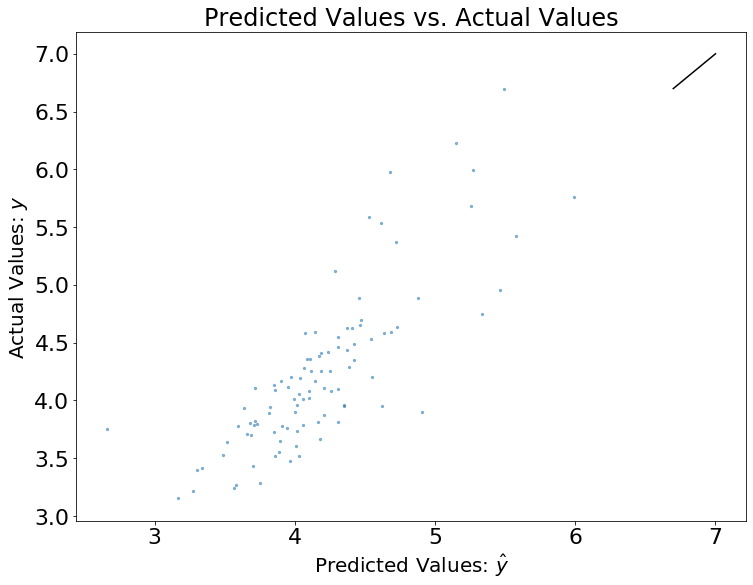

In [81]:

plt.figure(figsize=(12,9))
plt.rc('font', size=22)
# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_pred, y_test, s=5, alpha = 0.5)

# Plot a line.
plt.plot([7, np.max(y_test)],
         [7, np.max(y_test)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

In [83]:
pickle.dump(linear_reg, open('model.p', 'wb'))